**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))

You are in singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


## Import library size

In [2]:
fdiry = file.path(FD_RES, "source")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat_lib = read_tsv(fpath, show_col_types = FALSE)
head(dat_lib)

Sample,Group,Size
<chr>,<chr>,<dbl>
Input1_20x,Input_20x,371718546
Input1,Input,18666630
Input2_20x,Input_20x,347635732
Input2,Input,20167924
Input3_20x,Input_20x,349994051
Input3,Input,23280988


In [5]:
vec_lib = dat_lib$Size
names(vec_lib) = dat_lib$Sample
head(vec_lib)

Input1_20x     Input1 Input2_20x     Input2 Input3_20x     Input3 
 371718546   18666630  347635732   20167924  349994051   23280988

In [7]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

fdiry = file.path(FD_RES, "count_fragment", "Input1")
fname = "target_PER1.bed.gz"
fpath = file.path(fdiry, fname)

dat_inp = read_tsv(fpath, col_types = ctypes, col_names = cnames)
head(dat_inp)

Chrom,Start,End,Count
<chr>,<dbl>,<dbl>,<dbl>
chr17,8148117,8149012,1
chr17,8148122,8149107,1
chr17,8148178,8149194,1
chr17,8148188,8149154,1
chr17,8148190,8149151,1
chr17,8148220,8149108,1


In [4]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

fdiry = file.path(FD_RES, "coverage", "target_PER1")
fname = "Input1_20x_perbase.txt"
fpath = file.path(fdiry, fname)

dat_inp = read_tsv(fpath, col_types = ctypes, col_names = cnames)
head(dat_inp)

Chrom,Loc,Depth
<chr>,<dbl>,<dbl>
chr17,8148000,501
chr17,8148001,501
chr17,8148002,500
chr17,8148003,492
chr17,8148004,495
chr17,8148005,497


In [6]:
vec_lib["Input1_20x"]

Input1_20x 
 371718546

In [26]:
dat = dat_inp
dat = dat %>% mutate(Depth_Norm = log2(Depth) - log2(vec_lib["Input1_20x"]))
head(dat)

Chrom,Loc,Depth,Depth_Norm
<chr>,<dbl>,<dbl>,<dbl>
chr17,8148000,501,-19.50097
chr17,8148001,501,-19.50097
chr17,8148002,500,-19.50385
chr17,8148003,492,-19.52712
chr17,8148004,495,-19.51835
chr17,8148005,497,-19.51253


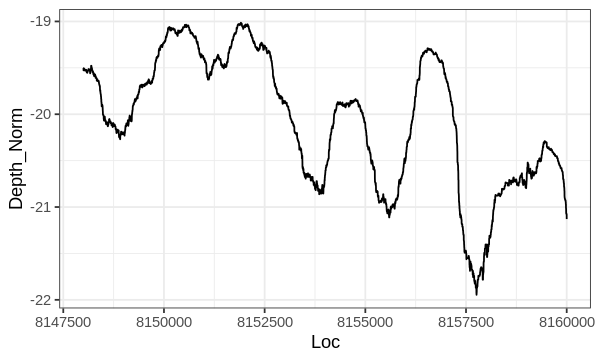

In [27]:
options(repr.plot.height=3, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Loc, y=Depth_Norm)) + geom_line() + theme_bw()
print(gpt)

## Input score (Input1_20x:Input1_20x)

In [11]:
fdiry = file.path(FD_RES, "input_score", "Input1_20x")
fname = "target_PER1_f50_Input1_20x.bed.gz"
fpath = file.path(fdiry, fname)
dat_isc_inp1_f50 = read_tsv(fpath, col_names = c("Chrom", "Start", "End", "Count", "Score"), show_col_types = FALSE)
head(dat_isc_inp1_f50)

Chrom,Start,End,Count,Score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148003,8148983,3,353
chr17,8148004,8148925,1,381
chr17,8148004,8148962,1,361
chr17,8148004,8148963,1,356
chr17,8148005,8149014,1,339
chr17,8148005,8149015,1,339


In [23]:
dat = dat_isc_inp1_f50
dat = dat %>% mutate(
    Loc = (Start + End) / 2, 
    Score_Norm = log2(Score) - log2(vec_lib["Input1_20x"]))
head(dat)

Chrom,Start,End,Count,Score,Loc,Score_Norm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148003,8148983,3,353,8148493,-20.00611
chr17,8148004,8148925,1,381,8148464,-19.89599
chr17,8148004,8148962,1,361,8148483,-19.97378
chr17,8148004,8148963,1,356,8148484,-19.99390
chr17,8148005,8149014,1,339,8148510,-20.06449
chr17,8148005,8149015,1,339,8148510,-20.06449


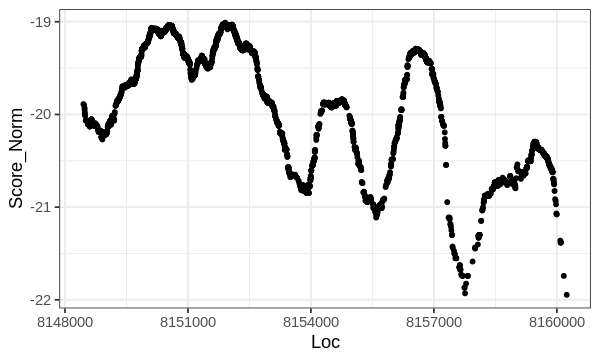

In [24]:
options(repr.plot.height=3, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Loc, y=Score_Norm)) + geom_point(size=1) + theme_bw()
print(gpt)

## Input score TFX2_Dex:Input1_20x)

In [17]:
fdiry = file.path(FD_RES, "input_score", "TFX2_Dex")
fname = "target_PER1_f50_Input1_20x.bed.gz"
fpath = file.path(fdiry, fname)
dat_isc_dex1_f50 = read_tsv(fpath, col_names = c("Chrom", "Start", "End", "Count", "Score"), show_col_types = FALSE)
head(dat_isc_dex1_f50)

Chrom,Start,End,Count,Score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8148888,1,398
chr17,8148097,8149186,1,341
chr17,8148180,8149106,1,341
chr17,8148267,8149280,1,326
chr17,8148267,8149281,1,326
chr17,8148267,8149282,2,326


In [21]:
dat = dat_isc_dex1_f50
dat = dat %>% mutate(
    Loc = (Start + End) / 2, 
    Score_Norm = log2(Score) - log2(vec_lib["TFX2_Dex"]))
head(dat)

Chrom,Start,End,Count,Score,Loc,Score_Norm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8148888,1,398,8148444,-16.79999
chr17,8148097,8149186,1,341,8148642,-17.02299
chr17,8148180,8149106,1,341,8148643,-17.02299
chr17,8148267,8149280,1,326,8148774,-17.08789
chr17,8148267,8149281,1,326,8148774,-17.08789
chr17,8148267,8149282,2,326,8148774,-17.08789


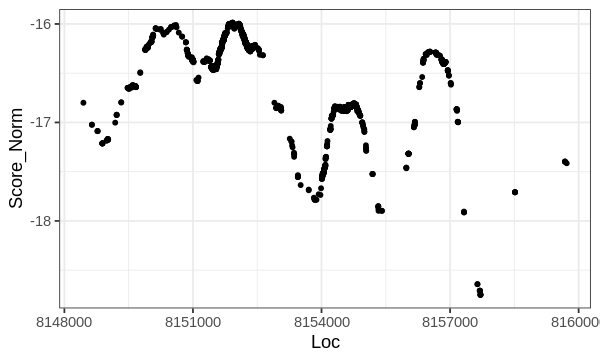

In [22]:
options(repr.plot.height=3, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Loc, y=Score_Norm)) + geom_point(size=1) + theme_bw()
print(gpt)

## Overlay

In [50]:
df1 = dat_isc_inp1_f50  %>% 
    mutate(Sample = "Input1_20x") %>% 
    mutate(
        Len = End - Start,
        Loc = (Start + End) / 2, 
        Score_Norm = log2(Score) - log2(Len) - log2(vec_lib["Input1_20x"]))

df2 = dat_isc_dex1_f50 %>% 
    mutate(Sample = "TFX2_Dex") %>% 
    mutate(
        Len = End - Start,
        Loc = (Start + End) / 2, 
        Score_Norm = log2(Score) - log2(Len) - log2(vec_lib["Input1_20x"]))

dat_isc = bind_rows(df1, df2)
head(dat_isc)

Chrom,Start,End,Count,Score,Sample,Len,Loc,Score_Norm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr17,8148003,8148983,3,353,Input1_20x,980,8148493,-29.94275
chr17,8148004,8148925,1,381,Input1_20x,921,8148464,-29.74305
chr17,8148004,8148962,1,361,Input1_20x,958,8148483,-29.87766
chr17,8148004,8148963,1,356,Input1_20x,959,8148484,-29.89929
chr17,8148005,8149014,1,339,Input1_20x,1009,8148510,-30.04320
chr17,8148005,8149015,1,339,Input1_20x,1010,8148510,-30.04463


In [51]:
dat = dat_inp
dat = dat %>% mutate(Depth_Norm = log2(Depth) - log2(vec_lib["Input1_20x"]))
head(dat)

Chrom,Loc,Depth,Depth_Norm
<chr>,<dbl>,<dbl>,<dbl>
chr17,8148000,501,-19.50097
chr17,8148001,501,-19.50097
chr17,8148002,500,-19.50385
chr17,8148003,492,-19.52712
chr17,8148004,495,-19.51835
chr17,8148005,497,-19.51253


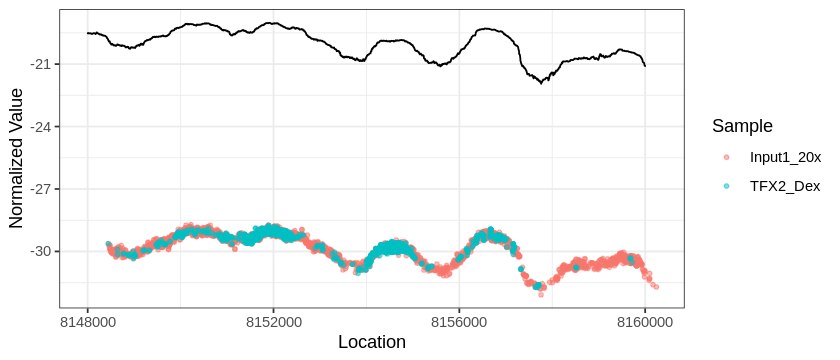

In [52]:
options(repr.plot.height=3, repr.plot.width=7)
gpt = ggplot() + 
    geom_point(
        data = dat_isc, 
        aes(x=Loc, y=Score_Norm, color=Sample),
        size=1, alpha=0.5) + 
    geom_line(
        data=dat, 
        aes(x=Loc, y=Depth_Norm)) +
    labs(x="Location", y="Normalized Value") +
    theme_bw()
print(gpt)

In [ ]:
target = "target_PER1"

In [ ]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")
target = "target_PER1"
fdiry  = file.path(FD_WRK, "coverage", target)

fname  = "Input?_perbase.txt"
lst_input = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})